## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df = pd.merge(mouse_metadata, study_results, how = "outer", on = "Mouse ID")
# Display the data table for preview
df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
unique_mice = df["Mouse ID"].nunique()
unique_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupeless_time = df.drop_duplicates(["Mouse ID", "Timepoint"], keep = "last")
dupeful = df[~df.index.isin(dupeless_time.index)]
dupeful
        

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
912,g989,Propriva,Female,21,26,10,51.745156,0
914,g989,Propriva,Female,21,26,15,51.325852,1
916,g989,Propriva,Female,21,26,20,55.326122,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
# optional_clean = dupeless_time.drop_duplicates("Mouse ID", keep = "last")
# optional_dupes = dupeless_time[~dupeless_time.index.isin(optional_clean.index)]
# optional_dupes
lost_mouse = df.loc[df["Mouse ID"] == "g989",:]
lost_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# df.drop_duplicates(["Mouse ID"], keep = "last")
clean = df.loc[df["Mouse ID"] != "g989",:]
clean.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
clean["Mouse ID"].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
regimen_group = clean.groupby("Drug Regimen")
tumean = regimen_group["Tumor Volume (mm3)"].mean()
tumed = regimen_group["Tumor Volume (mm3)"].median()
tuvar = regimen_group["Tumor Volume (mm3)"].var()
tustd = regimen_group["Tumor Volume (mm3)"].std()
tusem = regimen_group["Tumor Volume (mm3)"].sem()

tumor_df = pd.DataFrame({
    "Mean": tumean,
    "Median": tumed,
    "Variance": tuvar,
    "Standard Deviation": tustd,
    "SEM": tusem
})
tumor_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
tumor_df_agg = clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
tumor_df_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

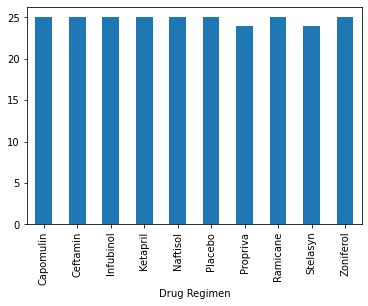

In [9]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
regimenbar = clean[["Mouse ID","Drug Regimen"]]

regimenbar = regimenbar.groupby("Drug Regimen")["Mouse ID"].nunique()

regimenbar.plot(kind = "bar")


(-0.75, 10.0)

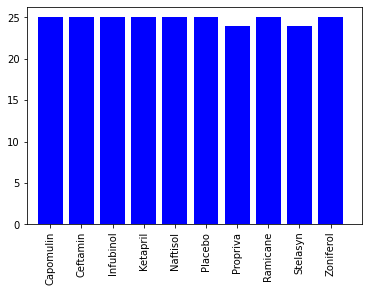

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
x_axis = np.arange(len(clean["Drug Regimen"].unique()))

tickloc = x_axis
ticks = sorted(clean["Drug Regimen"].unique())
plt.bar(x_axis, regimenbar, color = "b", align = "center")
plt.xticks(tickloc, ticks, rotation = "vertical")
plt.xlim(-0.75, len(x_axis))


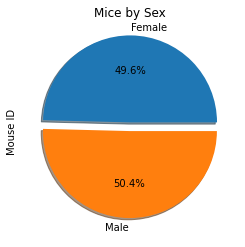

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = clean.groupby("Sex")["Mouse ID"].nunique()
gender.plot(kind = "pie", autopct='%1.1f%%', shadow=True, explode = [0.1,0], title = "Mice by Sex")

([<matplotlib.patches.Wedge at 0x1b33ce475f8>,
 [Text(0.015200833722885016, 1.1999037189100337, 'Female'),
  Text(-0.0139340975793114, -1.0999117423341975, 'Male')],
 [Text(0.008867153005016259, 0.699943836030853, '49.6%'),
  Text(-0.007600416861442581, -0.5999518594550168, '50.4%')])

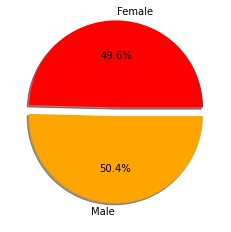

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = gender.index
size = gender
colors = ["red", "orange"]
explode = (0.1,0)
plt.pie(size, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True)

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
four = clean.loc[(clean["Drug Regimen"] == "Capomulin") | (clean["Drug Regimen"] == "Ramicane") 
                 |(clean["Drug Regimen"] == "Infubinol") |(clean["Drug Regimen"] == "Ceftamin"), :]

# Start by getting the last (greatest) timepoint for each mouse
last = four.drop_duplicates(["Mouse ID"], keep = "last")

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
combin = pd.merge(four, last[["Mouse ID", "Tumor Volume (mm3)"]], how = "left", on = "Mouse ID", suffixes=(" Over Time", " Final"))
combin

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3) Over Time,Metastatic Sites,Tumor Volume (mm3) Final
0,k403,Ramicane,Male,21,16,0,45.000000,0,22.050126
1,k403,Ramicane,Male,21,16,5,38.825898,0,22.050126
2,k403,Ramicane,Male,21,16,10,35.014271,1,22.050126
3,k403,Ramicane,Male,21,16,15,34.223992,1,22.050126
4,k403,Ramicane,Male,21,16,20,32.997729,1,22.050126
...,...,...,...,...,...,...,...,...,...
809,z581,Infubinol,Female,24,25,25,54.316407,2,62.754451
810,z581,Infubinol,Female,24,25,30,56.286750,2,62.754451
811,z581,Infubinol,Female,24,25,35,58.628399,3,62.754451
812,z581,Infubinol,Female,24,25,40,60.053740,3,62.754451


In [61]:
# Put treatments into a list for for loop (and later for plot labels)
treats = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

quartile_dict = {
    "Drug Regimen":treats,
    "Lower Quartile":[],
    "Upper Quartile":[],
    "Interquartile Range": [],
    "Median": [],
    "Lower Bound":[],
    "Upper Bound":[]
}

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for i in treats:    
    place = last.loc[(last["Drug Regimen"] == i),:]
    quartile = place["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    lowerq = quartile[0.25]
    medi = quartile[0.5]
    upperq = quartile[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    quartile_dict["Lower Quartile"].append(lowerq)
    quartile_dict["Upper Quartile"].append(upperq)
    quartile_dict["Interquartile Range"].append(iqr)
    quartile_dict["Median"].append(medi)
    quartile_dict["Lower Bound"].append(lower_bound)
    quartile_dict["Upper Bound"].append(upper_bound)

quartile_df = pd.DataFrame(quartile_dict)
    # Locate the rows which contain mice on each drug and get the tumor volumes
capo = last.loc[(last["Drug Regimen"] == "Capomulin"),:]
ram = last.loc[(last["Drug Regimen"] == "Ramicane"),:]
infu = last.loc[(last["Drug Regimen"] == "Infubinol"),:]
ceft = last.loc[(last["Drug Regimen"] == "Ceftamin"),:]
    # add subset 

    
    # Determine outliers using upper and lower bounds
capooutliers = capo.loc[(capo["Tumor Volume (mm3)"] < quartile_dict["Lower Bound"][0]) | 
                        (capo["Tumor Volume (mm3)"] > quartile_dict["Upper Bound"][0]), :]
ramout = ram.loc[(ram["Tumor Volume (mm3)"] < quartile_dict["Lower Bound"][1]) | 
                        (ram["Tumor Volume (mm3)"] > quartile_dict["Upper Bound"][1]), :]
infuout = infu.loc[(infu["Tumor Volume (mm3)"] < quartile_dict["Lower Bound"][2]) | 
                        (infu["Tumor Volume (mm3)"] > quartile_dict["Upper Bound"][2]), :]
ceftout = ceft.loc[(ceft["Tumor Volume (mm3)"] < quartile_dict["Lower Bound"][3]) | 
                        (ceft["Tumor Volume (mm3)"] > quartile_dict["Upper Bound"][3]), :]
outmerge1 = pd.merge(capooutliers, ramout, how="outer")
outmerge2 = pd.merge(infuout, ceftout, how = "outer")
outliers = pd.merge(outmerge1, outmerge2, how = "outer")
outliers

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,c326,Infubinol,Female,18,25,5,36.321346,0


([<matplotlib.axis.XTick at 0x1b33dab2748>,
 [Text(0, 0, 'Capomulin'),
  Text(0, 0, 'Ramicane'),
  Text(0, 0, 'Infubinol'),
  Text(0, 0, 'Ceftamin')])

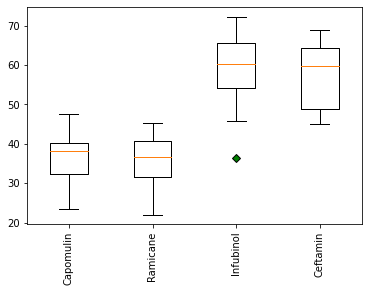

In [56]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data = [capo["Tumor Volume (mm3)"], ram["Tumor Volume (mm3)"], 
        infu["Tumor Volume (mm3)"], ceft["Tumor Volume (mm3)"]]
green_diamond = dict(markerfacecolor="g", marker = "D")
plt.boxplot(data, flierprops=green_diamond)
plt.xticks([1,2,3,4], treats, rotation = "vertical")

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

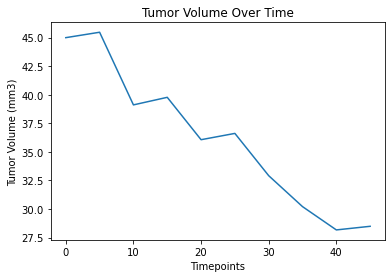

In [26]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capoline = clean.loc[(clean["Mouse ID"] == "x401"),:]
x_axis = capoline["Timepoint"]
y_axis = capoline["Tumor Volume (mm3)"]
plt.plot(x_axis, y_axis)
plt.title("Tumor Volume Over Time")
plt.xlabel("Timepoints")
plt.ylabel("Tumor Volume (mm3)")

Text(0.5, 1.0, 'Weight vs Volume')

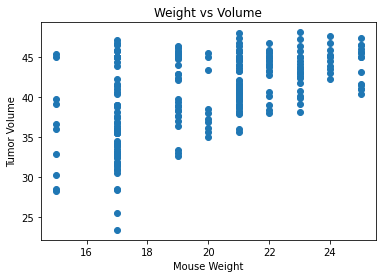

In [25]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
x_weight = capo["Weight (g)"]
y_vol = capo["Tumor Volume (mm3) Over Time"]
plt.scatter(x_weight, y_vol)
plt.xlabel("Mouse Weight")
plt.ylabel("Tumor Volume")
plt.title("Weight vs Volume")

## Correlation and Regression

The correlation between both factors is 0.53
The r-squared is: 0.2763600223455911


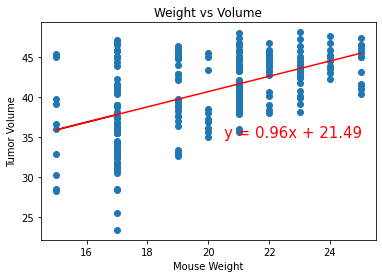

In [23]:
# Calculate the correlation coefficient and linear regression model
# for mouse weight and average tumor volume for the Capomulin regimen
weight = capo.iloc[:,4]
tumvol = capo.iloc[:,6]
correlation = st.pearsonr(weight,tumvol)
print(f"The correlation between both factors is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, tumvol)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weight, tumvol)
plt.plot(weight, regress_values, "r-")
plt.annotate(line_eq, (20.5,35), fontsize=15, color="red")
plt.xlabel("Mouse Weight")
plt.ylabel("Tumor Volume")
plt.title("Weight vs Volume")
print(f"The r-squared is: {rvalue**2}")
plt.show()